# Image Data Augmentation on Fashion-MNIST

### Load and check the data using the data.py file

In [ ]:
import sys
sys.path.append("..")

from src.data import load_data

(x_train, y_train), (x_val, y_val), (x_test, y_test) = load_data()

print("Train:", x_train.shape)
print("Val:", x_val.shape)
print("Test:", x_test.shape)
print("Range:", x_train.min(), x_train.max())

c:\Users\ASUS\Documents\Learning_Projects\TensorFlow_Project\venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


Train: (54000, 28, 28, 1)
Val: (6000, 28, 28, 1)
Test: (10000, 28, 28, 1)
Range: 0.0 1.0


#### Visual Sanity Check

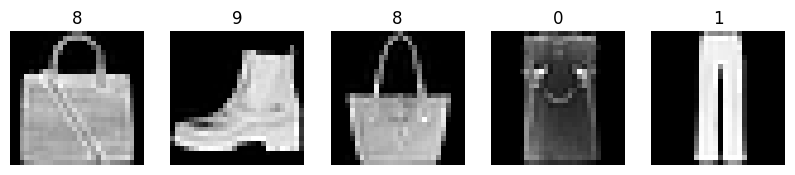

In [3]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(10, 2))

for i, ax in enumerate(axes):
    ax.imshow(x_train[i].squeeze(), cmap="gray")
    ax.set_title(str(y_train[i]))
    ax.axis("off")

plt.show()


In [ ]:
### Data Augmentation

In [22]:
import src.augment
print(dir(src.augment))

['ImageDataGenerator', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'augment_image_batch', 'create_augmentation_pipeline', 'create_augmented_dataset', 'get_augmentation_preview', 'np', 'tf']


In [ ]:
import tensorflow as tf
import numpy as np
import sys
import os

# Reload modules to clear any cache
import importlib
if 'src.augment' in sys.modules:
    del sys.modules['src.augment']

# --- 1. Import your custom module ---
from src.augment import get_augmented_dataset, visualize_augmentation

# --- 2. Load Data ---
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize
x_train = x_train.astype('float32') / 255.0
x_train = np.expand_dims(x_train, -1)

# --- 3. Use your module to create the dataset ---
# This one line now handles augmentation with MixUp
train_dataset = get_augmented_dataset(
    x_train, 
    y_train, 
    batch_size=32, 
    use_mixup=True
)

# --- 4. Verify it works ---
print("✓ Augmented dataset created successfully!")

# Get a sample batch to verify
sample_images, sample_labels = next(iter(train_dataset))
print(f"Sample batch shape - Images: {sample_images.shape}, Labels: {sample_labels.shape}")
print(f"✓ Ready for model training!")


Generating visualization of the 5 augmentation points...


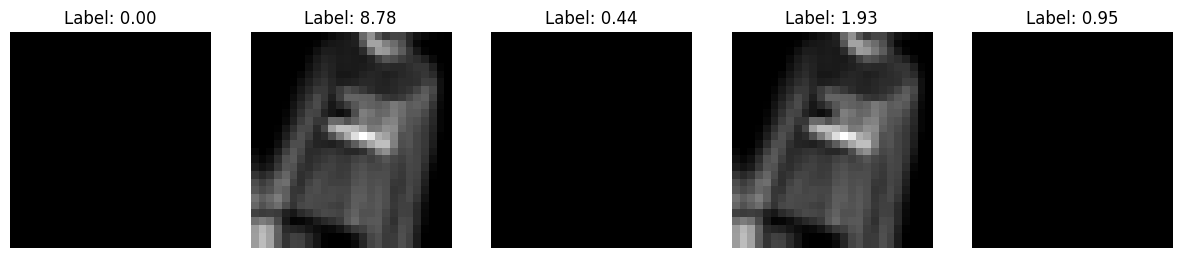

In [14]:
# --- 5. Visualization ---
# Since you imported the function directly, call it by name
print("Generating visualization of the 5 augmentation points...")

# We use a small subset (e.g., first 100 images) to keep it fast
visualize_augmentation(x_train[:100], y_train[:100])